In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('../artifacts/raw/data.csv')

In [12]:
df.head()

Timestamp  Machine_ID Operation_Mode  Temperature_C  \
0  2024-01-01 00:00:00          39           Idle      74.137590   
1  2024-01-01 00:01:00          29         Active      84.264558   
2  2024-01-01 00:02:00          15         Active      44.280102   
3  2024-01-01 00:03:00          43         Active      40.568502   
4  2024-01-01 00:04:00           8           Idle      75.063817   

   Vibration_Hz  Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
0      3.500595              8.612162           10.650542       0.207764   
1      3.355928              2.268559           29.111810       2.228464   
2      2.079766              6.144105           18.357292       1.639416   
3      0.298238              4.067825           29.153629       1.161021   
4      0.345810              6.225737           34.029191       4.796520   

   Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
0                       7.751261                     477.657391   
1                       4.989172                     398.174747   
2                       0.456816                     108.074959   
3                       4.582974                     329.579410   
4                       2.287716                     159.113525   

   Predictive_Maintenance_Score  Error_Rate_% Efficiency_Status  
0                      0.344650     14.965470               Low  
1                      0.769848      7.678270               Low  
2                      0.987086      8.198391               Low  
3                      0.983390      2.740847            Medium  
4                      0.573117     12.100686               Low

In [13]:
df.shape

(100000, 13)

In [14]:
df["Operation_Mode"].value_counts()

Operation_Mode
Active         70054
Idle           20057
Maintenance     9889
Name: count, dtype: int64

In [16]:
df.columns

Index(['Timestamp', 'Machine_ID', 'Operation_Mode', 'Temperature_C',
       'Vibration_Hz', 'Power_Consumption_kW', 'Network_Latency_ms',
       'Packet_Loss_%', 'Quality_Control_Defect_Rate_%',
       'Production_Speed_units_per_hr', 'Predictive_Maintenance_Score',
       'Error_Rate_%', 'Efficiency_Status'],
      dtype='str')

In [17]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Timestamp                      100000 non-null  str    
 1   Machine_ID                     100000 non-null  int64  
 2   Operation_Mode                 100000 non-null  str    
 3   Temperature_C                  100000 non-null  float64
 4   Vibration_Hz                   100000 non-null  float64
 5   Power_Consumption_kW           100000 non-null  float64
 6   Network_Latency_ms             100000 non-null  float64
 7   Packet_Loss_%                  100000 non-null  float64
 8   Quality_Control_Defect_Rate_%  100000 non-null  float64
 9   Production_Speed_units_per_hr  100000 non-null  float64
 10  Predictive_Maintenance_Score   100000 non-null  float64
 11  Error_Rate_%                   100000 non-null  float64
 12  Efficiency_Status              100000 non-

### Data Processing

In [19]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'],errors='coerce')

In [20]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Timestamp                      100000 non-null  datetime64[us]
 1   Machine_ID                     100000 non-null  int64         
 2   Operation_Mode                 100000 non-null  str           
 3   Temperature_C                  100000 non-null  float64       
 4   Vibration_Hz                   100000 non-null  float64       
 5   Power_Consumption_kW           100000 non-null  float64       
 6   Network_Latency_ms             100000 non-null  float64       
 7   Packet_Loss_%                  100000 non-null  float64       
 8   Quality_Control_Defect_Rate_%  100000 non-null  float64       
 9   Production_Speed_units_per_hr  100000 non-null  float64       
 10  Predictive_Maintenance_Score   100000 non-null  float64       
 11  Error_Rate_%

In [23]:
df.isnull().sum()

Timestamp                        0
Machine_ID                       0
Operation_Mode                   0
Temperature_C                    0
Vibration_Hz                     0
Power_Consumption_kW             0
Network_Latency_ms               0
Packet_Loss_%                    0
Quality_Control_Defect_Rate_%    0
Production_Speed_units_per_hr    0
Predictive_Maintenance_Score     0
Error_Rate_%                     0
Efficiency_Status                0
dtype: int64

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
categorical_cols = ['Operation_Mode','Efficiency_Status']
for cols in categorical_cols:
    df[cols] = df[cols].astype('category')

In [26]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Timestamp                      100000 non-null  datetime64[us]
 1   Machine_ID                     100000 non-null  int64         
 2   Operation_Mode                 100000 non-null  category      
 3   Temperature_C                  100000 non-null  float64       
 4   Vibration_Hz                   100000 non-null  float64       
 5   Power_Consumption_kW           100000 non-null  float64       
 6   Network_Latency_ms             100000 non-null  float64       
 7   Packet_Loss_%                  100000 non-null  float64       
 8   Quality_Control_Defect_Rate_%  100000 non-null  float64       
 9   Production_Speed_units_per_hr  100000 non-null  float64       
 10  Predictive_Maintenance_Score   100000 non-null  float64       
 11  Error_Rate_%

### EDA

In [27]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [28]:
numeric_cols

['Machine_ID',
 'Temperature_C',
 'Vibration_Hz',
 'Power_Consumption_kW',
 'Network_Latency_ms',
 'Packet_Loss_%',
 'Quality_Control_Defect_Rate_%',
 'Production_Speed_units_per_hr',
 'Predictive_Maintenance_Score',
 'Error_Rate_%']

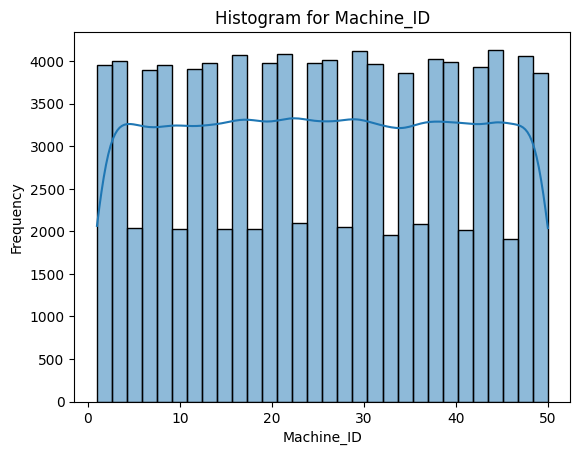

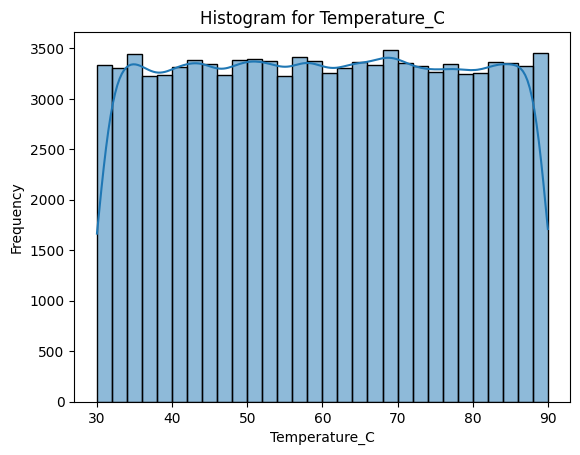

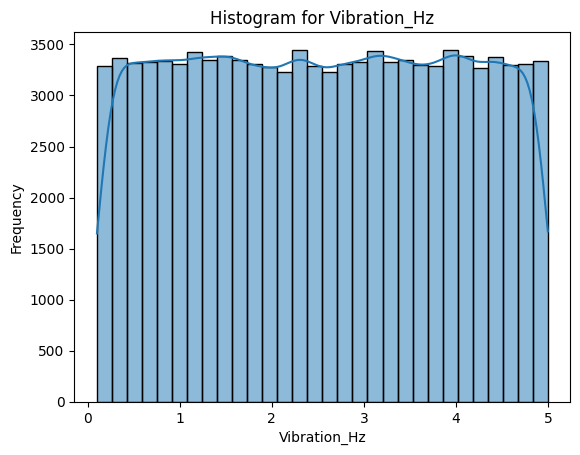

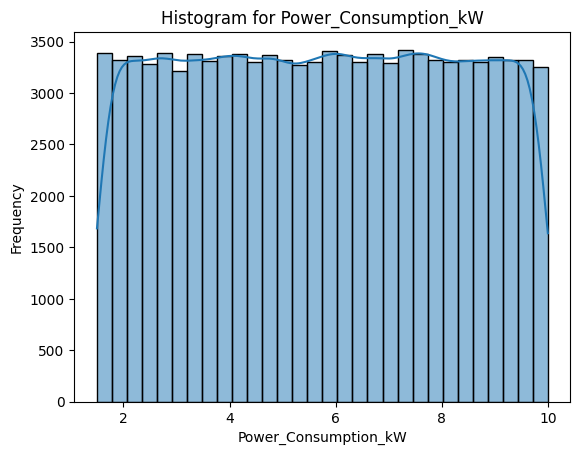

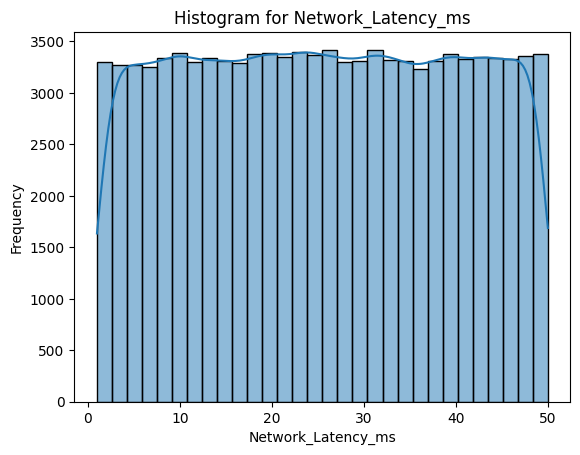

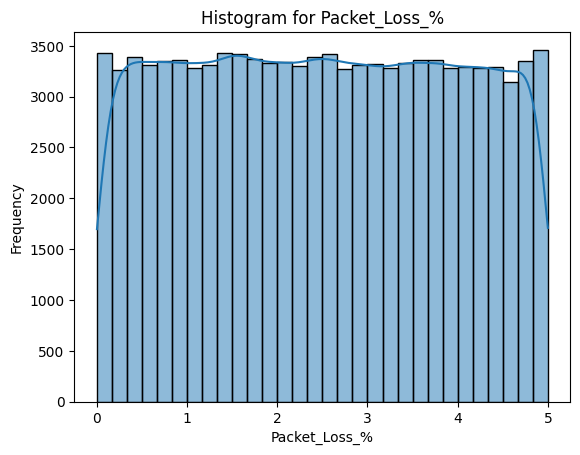

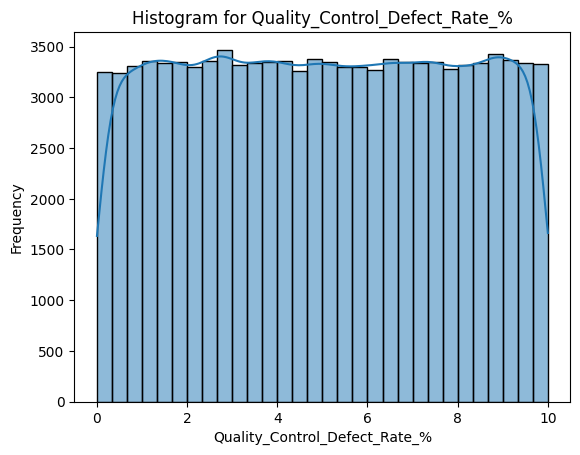

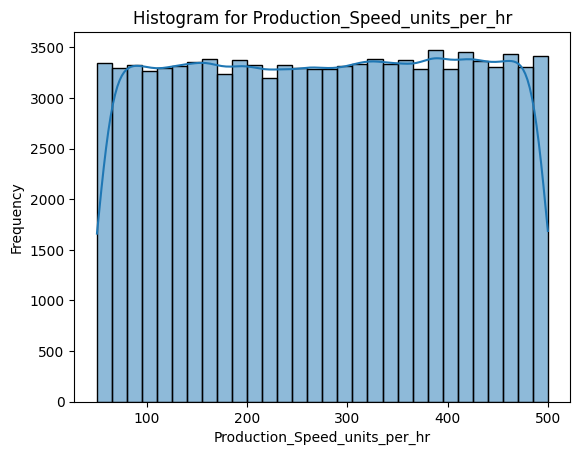

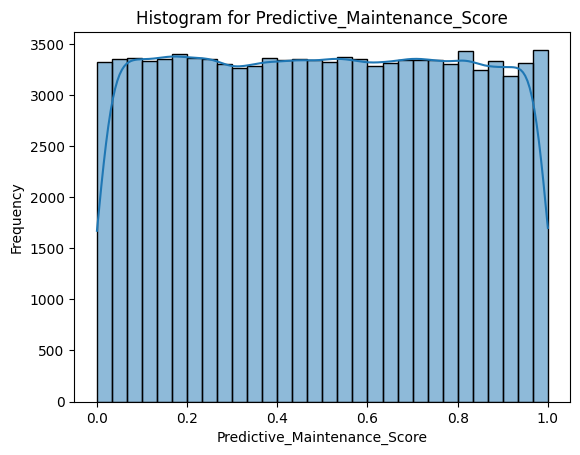

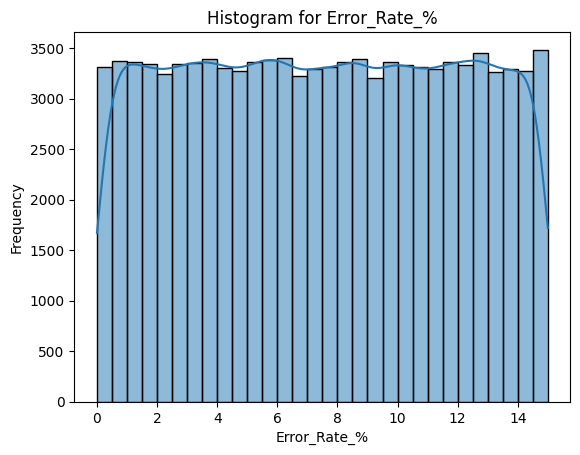

In [31]:
for col in numeric_cols:
    plt.Figure(figsize=(5,5))
    sns.histplot(df[col],kde=True, bins=30)
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

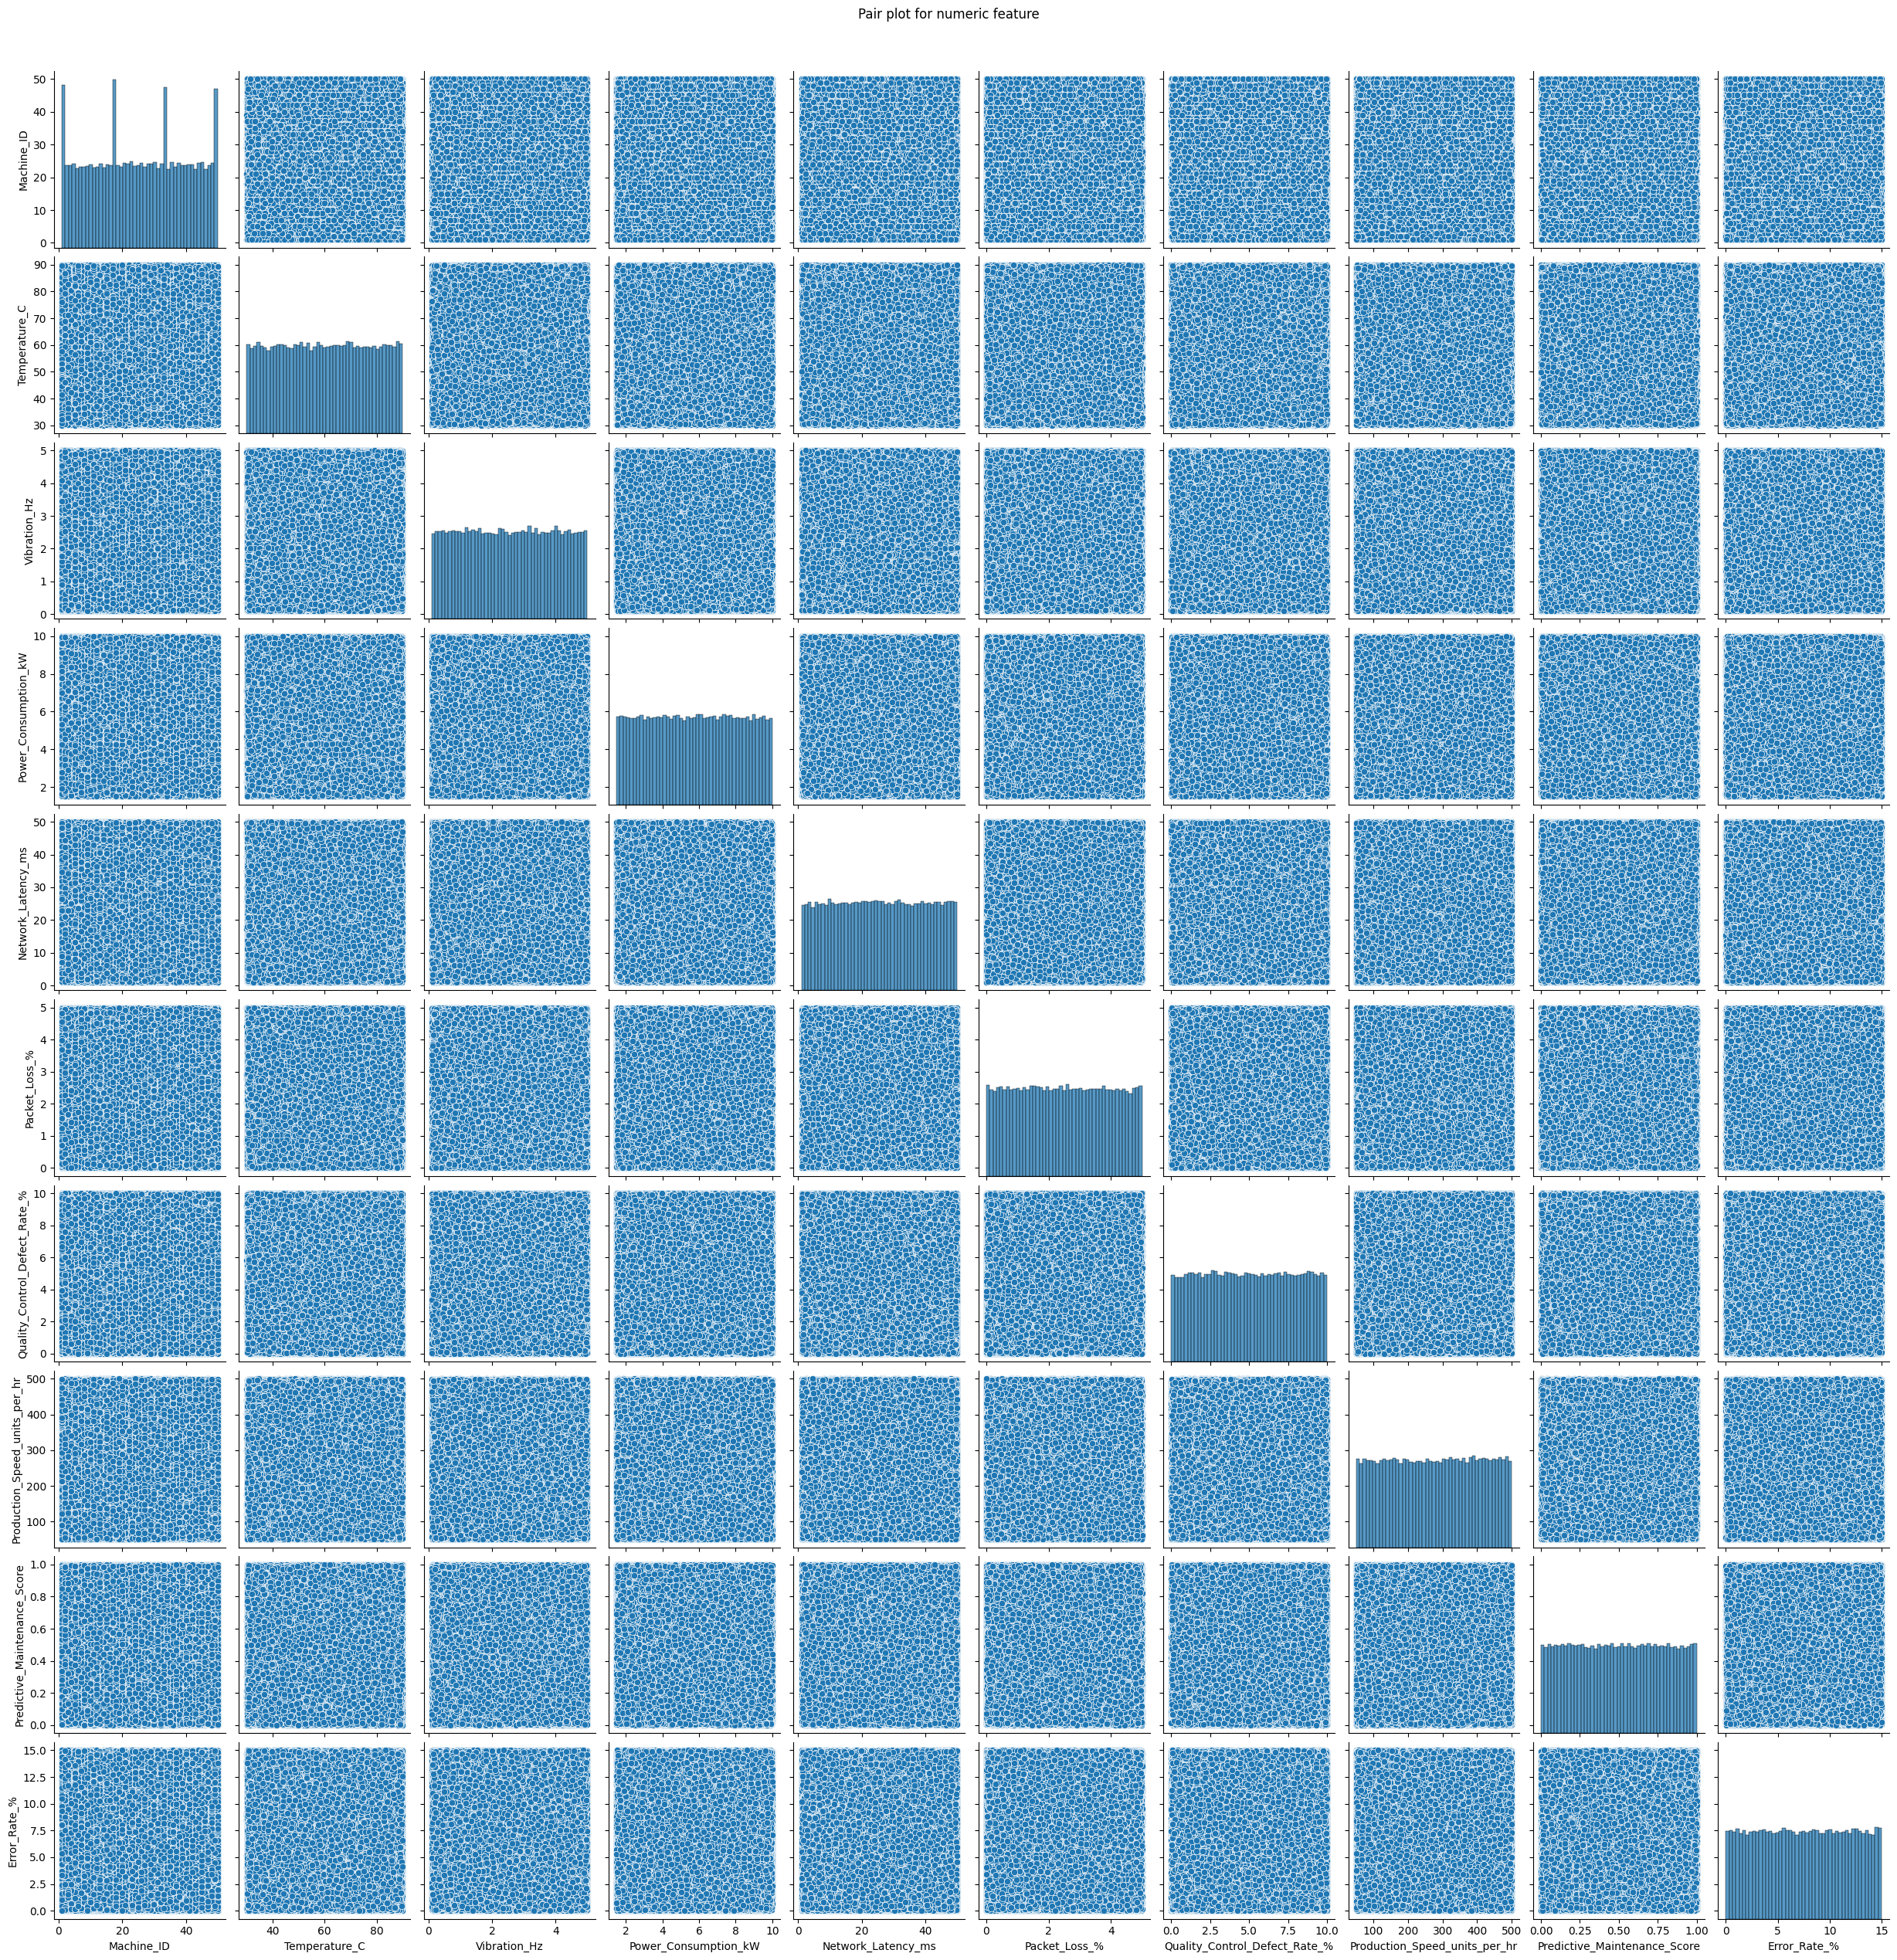

In [32]:
sns.pairplot(df[numeric_cols])
plt.suptitle("Pair plot for numeric feature", y=1.02)
plt.show()

Text(0.5, 1.0, 'Efficiency Status countplot')

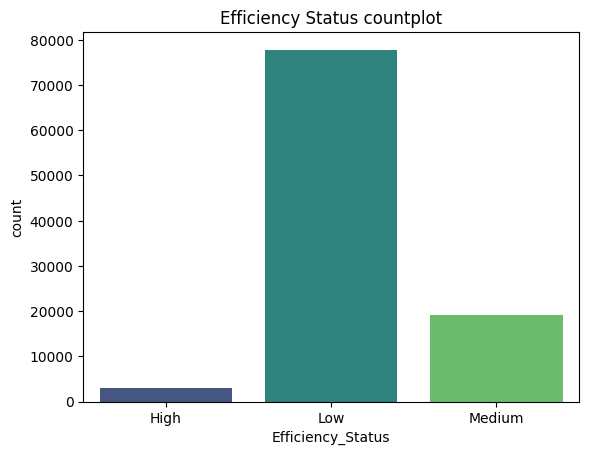

In [33]:
plt.Figure(figsize=(5,5))
sns.countplot(x= "Efficiency_Status",data=df,palette='viridis')
plt.title("Efficiency Status countplot")

### Feature Engineering

In [34]:
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['hour'] = df['Timestamp'].dt.hour


In [43]:
df.head()

Operation_Mode  Temperature_C  Vibration_Hz  Power_Consumption_kW  \
0           Idle      74.137590      3.500595              8.612162   
1         Active      84.264558      3.355928              2.268559   
2         Active      44.280102      2.079766              6.144105   
3         Active      40.568502      0.298238              4.067825   
4           Idle      75.063817      0.345810              6.225737   

   Network_Latency_ms  Packet_Loss_%  Quality_Control_Defect_Rate_%  \
0           10.650542       0.207764                       7.751261   
1           29.111810       2.228464                       4.989172   
2           18.357292       1.639416                       0.456816   
3           29.153629       1.161021                       4.582974   
4           34.029191       4.796520                       2.287716   

   Production_Speed_units_per_hr  Predictive_Maintenance_Score  Error_Rate_%  \
0                     477.657391                      0.344650     14.965470   
1                     398.174747                      0.769848      7.678270   
2                     108.074959                      0.987086      8.198391   
3                     329.579410                      0.983390      2.740847   
4                     159.113525                      0.573117     12.100686   

  Efficiency_Status  Year  Month  Day  hour  Efficiency_Target  
0               Low  2024      1    1     0                  1  
1               Low  2024      1    1     0                  1  
2               Low  2024      1    1     0                  1  
3            Medium  2024      1    1     0                  2  
4               Low  2024      1    1     0                  1

In [39]:
df.drop(columns=['Timestamp','Machine_ID'],inplace = True)


In [41]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
df['Efficiency_Target'] = label_encoder.fit_transform(df["Efficiency_Status"])

In [54]:
label_encoder = LabelEncoder()
df['Operation_Mode'] = label_encoder.fit_transform(df["Operation_Mode"])

In [44]:
df['Efficiency_Target'].value_counts()

Efficiency_Target
1    77825
2    19189
0     2986
Name: count, dtype: int64

In [46]:
df["Efficiency_Status"].value_counts()

Efficiency_Status
Low       77825
Medium    19189
High       2986
Name: count, dtype: int64

In [48]:
df.columns

Index(['Operation_Mode', 'Temperature_C', 'Vibration_Hz',
       'Power_Consumption_kW', 'Network_Latency_ms', 'Packet_Loss_%',
       'Quality_Control_Defect_Rate_%', 'Production_Speed_units_per_hr',
       'Predictive_Maintenance_Score', 'Error_Rate_%', 'Efficiency_Status',
       'Year', 'Month', 'Day', 'hour', 'Efficiency_Target'],
      dtype='str')

In [55]:
features = ['Operation_Mode', 'Temperature_C', 'Vibration_Hz',
       'Power_Consumption_kW', 'Network_Latency_ms', 'Packet_Loss_%',
       'Quality_Control_Defect_Rate_%', 'Production_Speed_units_per_hr',
       'Predictive_Maintenance_Score', 'Error_Rate_%','Predictive_Maintenance_Score', 'Error_Rate_%',]

In [56]:
X= df[features]

In [57]:
y = df["Efficiency_Target"]

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)


In [61]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)

In [63]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=42,max_iter=1000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [65]:
y_pred = clf.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score,classification_report

In [67]:
accuracy_score(y_test,y_pred)

0.91705

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       597
           1       0.95      0.96      0.95     15565
           2       0.80      0.76      0.78      3838

    accuracy                           0.92     20000
   macro avg       0.86      0.85      0.86     20000
weighted avg       0.92      0.92      0.92     20000



### Permutation importance

In [70]:
from sklearn.inspection import permutation_importance

In [71]:
result = permutation_importance(clf,X_test,y_test,n_repeats=10,random_state=42,n_jobs=-1)

In [79]:
importance_df = pd.DataFrame({
    'features':features,
    'Importances': result.importances_mean
    })

In [80]:
importance_df.sort_values(by='Importances',ascending=False)

features  Importances
7   Production_Speed_units_per_hr     0.118260
9                    Error_Rate_%     0.099495
11                   Error_Rate_%     0.099495
3            Power_Consumption_kW     0.000375
6   Quality_Control_Defect_Rate_%     0.000200
1                   Temperature_C     0.000065
2                    Vibration_Hz     0.000060
8    Predictive_Maintenance_Score     0.000060
10   Predictive_Maintenance_Score     0.000060
4              Network_Latency_ms     0.000030
0                  Operation_Mode    -0.000040
5                   Packet_Loss_%    -0.000050